Data Mining Class Final Project

Coffee Rating Predictor Model

Data Source: https://www.kaggle.com/datasets/hanifalirsyad/coffee-scrap-coffeereview?select=coffee_df_og.csv


Sho Xiong, Levi Watson, Tao Vue, and Abdellah Afellah

4/19/2023

# Import Libraries 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Importing Dataset


In [3]:
# Load in the dataset
coffee_data = pd.read_csv("coffee_df_with_type_and_region.csv")
# Lets peak at it
coffee_data.head()


,slug,all_text,rating,roaster,name,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,...,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/wilton-ben...,\n\n\n95\n\n\nJBC Coffee Roasters\nWilton Ben...,95,JBC Coffee Roasters,Wilton Benitez Geisha,0,0,0,0,0,...,59/81,9.0,9.0,9.0,9.0,9.0,NaN,"Richly floral-toned, exceptionally sweet. Dist...",Produced by Wilton Benitez of Macarena Farm en...,"A nuanced, complex experimentally processed Co..."
1,https://www.coffeereview.com/review/colombia-c...,\n\n\n95\n\n\nBird Rock Coffee Roasters\nColo...,95,Bird Rock Coffee Roasters,Colombia Cerro Azul Geisha,0,0,0,0,0,...,62/80,9.0,9.0,9.0,9.0,9.0,NaN,"Richly aromatic, chocolaty, fruit-toned. Dark ...",Produced by Rigoberto Herrera of Granja La Esp...,"A trifecta of fruit, chocolate and flowers, bo..."
2,https://www.coffeereview.com/review/yirgacheff...,\n\n\n94\n\n\nRegent Coffee\nYirgacheffe Meng...,94,Regent Coffee,Yirgacheffe Mengesha Natural,1,0,0,0,0,...,60/77,9.0,9.0,9.0,9.0,8.0,NaN,"High-toned, fruit-driven. Boysenberry, pear, c...",Produced at Mengesha Farm from selections of i...,A fruit medley in a cup — think boysenberry an...
3,https://www.coffeereview.com/review/colombia-t...,\n\n\n93\n\n\nRegent Coffee\nColombia Tolima ...,93,Regent Coffee,Colombia Tolima Finca El Mirador Washed Anaerobic,0,0,0,0,0,...,59/79,9.0,9.0,8.0,9.0,8.0,NaN,"Delicately fruit-toned. Guava, ginger blossom,...",Produced by Victor Gutiérrez of Finca Mirador ...,"An appealing washed anaerobic cup: deep-toned,..."
4,https://www.coffeereview.com/review/panama-gei...,\n\n\n94\n\n\nTheory Coffee Roasters\nPanama ...,94,Theory Coffee Roasters,Panama Geisha Finca Debra Symbiosis,0,0,1,0,0,...,62/80,9.0,9.0,9.0,9.0,8.0,NaN,"Richly fruit-forward, floral-toned. Lychee, te...",Produced by Jamison Savage of Finca Debra enti...,A floral- and fruit-driven anaerobic natural P...


# Data Cleaning 
Let's clean up the data and create a subset of variables we want to use in the regression model



In [10]:
# Lets peek at the columns first
list(coffee_data.columns)
# This does the samething as above
list(coffee_data.keys())

# Drop the columns we dont need
coffee_df = coffee_data.drop(columns = ['slug', 'all_text', 'with_milk','desc_1', 'desc_2', 'desc_3', 'name', 'review_date'])
# Check if they dropped
coffee_df.keys()

# Check the dataframe
coffee_df.shape #2282 rows x 31 columns
coffee_df.describe()


,rating,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america,type_espresso,type_organic,type_fair_trade,...,type_blend,type_estate,type_peaberry,type_barrel_aged,type_aged,aroma,acid,body,flavor,aftertaste
count,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,...,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2256.000000,1955.000000,2280.000000,2280.000000,2280.000000
mean,92.986854,0.389571,0.004820,0.209904,0.056091,0.049080,0.162577,0.134093,0.069676,0.028484,...,0.131025,0.337862,0.013146,0.002191,0.003944,8.819592,8.491049,8.595175,8.942105,8.091667
std,2.026091,0.487760,0.069276,0.407329,0.230148,0.216082,0.369060,0.340827,0.254656,0.166387,...,0.337502,0.473085,0.113926,0.046768,0.062690,0.487345,0.635279,0.529659,0.445522,0.553358
min,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,5.000000,2.000000,2.000000
25%,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,8.000000,8.000000,9.000000,8.000000
50%,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,9.000000,8.000000
75%,94.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,9.000000,8.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Missing Values


In [11]:
# Check for nulls in data
coffee_df.isnull().sum()
# We can see where the null is the columns
coffee_df[coffee_df['acid'].isnull()]

# Drop the rows with null values by specific column
coffee_df = coffee_df.dropna(subset = ['acid'])
# Drop all the null values
coffee_df = coffee_df.dropna()
# Check for nulls in data
coffee_df.isnull().sum()



rating                    0
roaster                   0
region_africa_arabia      0
region_caribbean          0
region_central_america    0
region_hawaii             0
region_asia_pacific       0
region_south_america      0
type_espresso             0
type_organic              0
type_fair_trade           0
type_decaffeinated        0
type_best_value           0
type_pod_capsule          0
type_blend                0
type_estate               0
type_peaberry             0
type_barrel_aged          0
type_aged                 0
location                  0
origin                    0
roast                     0
est_price                 0
agtron                    0
aroma                     0
acid                      0
body                      0
flavor                    0
aftertaste                0
dtype: int64

# Investigate unique values of each feature

In [12]:

for column in coffee_df:
  unique_vals = np.unique(coffee_df[column])
  num_values = len(unique_vals)
  if num_values < 10:
    print('Unique values of feature: {} : {} --> {}'.format(column, num_values, unique_vals))
  else:
    print('Unique values of feature: {} : {}'.format(column, num_values))




Unique values of feature: rating : 19
Unique values of feature: roaster : 416
Unique values of feature: region_africa_arabia : 2 --> [0 1]
Unique values of feature: region_caribbean : 2 --> [0 1]
Unique values of feature: region_central_america : 2 --> [0 1]
Unique values of feature: region_hawaii : 2 --> [0 1]
Unique values of feature: region_asia_pacific : 2 --> [0 1]
Unique values of feature: region_south_america : 2 --> [0 1]
Unique values of feature: type_espresso : 2 --> [0 1]
Unique values of feature: type_organic : 2 --> [0 1]
Unique values of feature: type_fair_trade : 2 --> [0 1]
Unique values of feature: type_decaffeinated : 2 --> [0 1]
Unique values of feature: type_best_value : 2 --> [0 1]
Unique values of feature: type_pod_capsule : 1 --> [0]
Unique values of feature: type_blend : 2 --> [0 1]
Unique values of feature: type_estate : 2 --> [0 1]
Unique values of feature: type_peaberry : 2 --> [0 1]
Unique values of feature: type_barrel_aged : 2 --> [0 1]
Unique values of fe

# Feature Selection


In [13]:
# Visualize the data using seaborn
plot = sns.pairplot(coffee_df)



Error in callback <function flush_figures at 0x7ff941030a60> (for post_execute):


KeyboardInterrupt: ignored

# Outlier Removal

In [14]:
#Removing outliers
coffee_df = coffee_df.sort_values('rating')
coffee_df = coffee_df.iloc[4:]
coffee_df = coffee_df.reset_index(drop = True)

# Visualize a subset


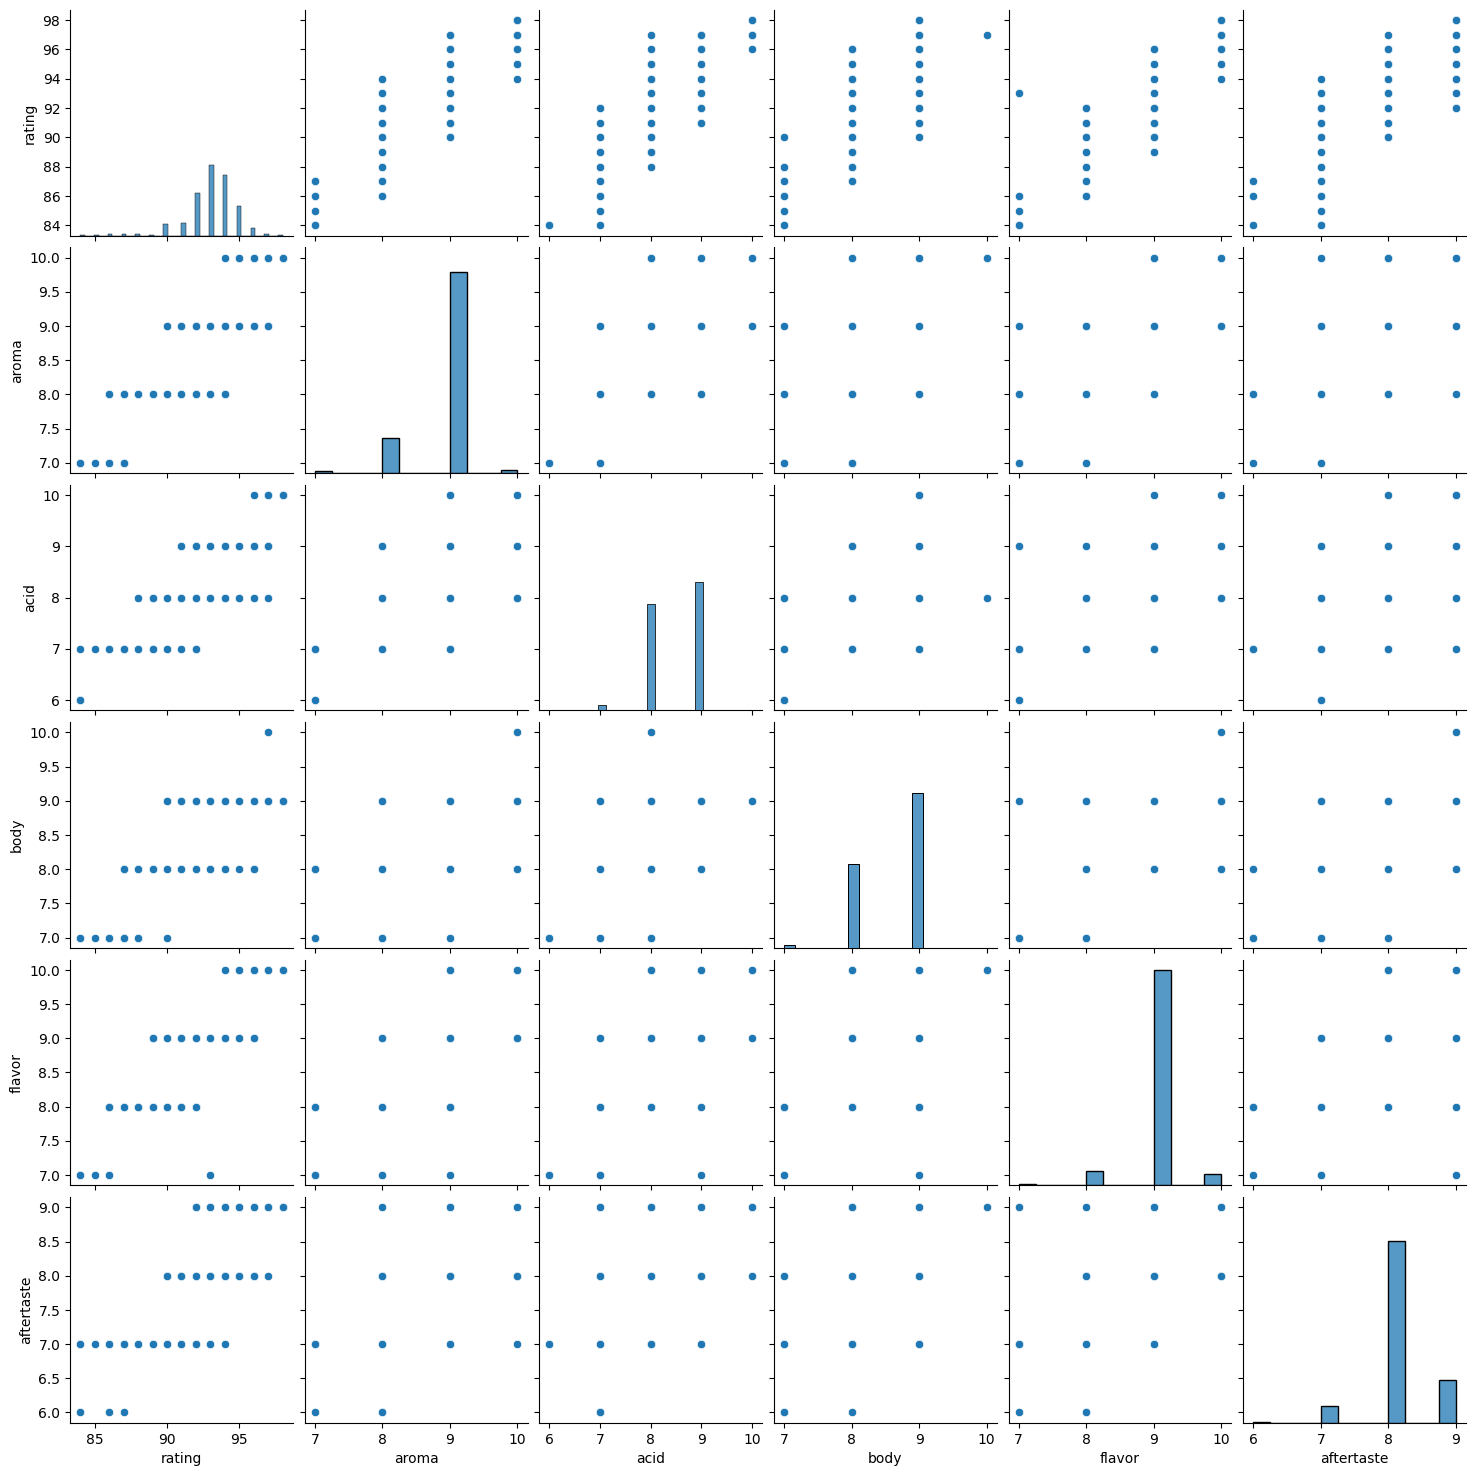

In [15]:
coffee_df.columns

plot = sns.pairplot(coffee_df[['rating','aroma', 'acid', 'body', 'flavor', 'aftertaste']])

# Split the Data to Train and Test


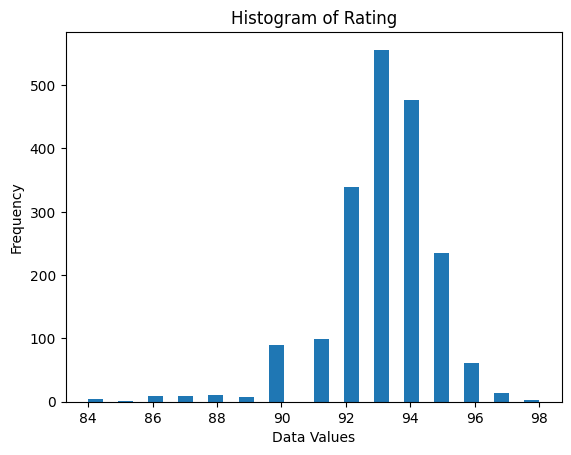

In [31]:
# Dataframe Looks good, we will be using 'rating' as the predictor variable
y = coffee_df['rating']
x = coffee_df[['aroma', 'acid', 'body', 'flavor', 'aftertaste']]
plt.hist(y, bins = 30)
plt.title("Histogram of Rating")
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.show()

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 42)



# Linear Regression Model
Training and predicting
Checking accuracy


In [32]:
# Create the regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Make prediction
predictions = model.predict(X_test)

# Evaluate the model
print(" Mean Sqaured Error: " , mean_squared_error(y_test, predictions))
print(" Mean Absolute Error: " , mean_absolute_error(y_test, predictions))
print()

# Coefficients of the regression model
coef = model.coef_

# Print the model
print("The Regression Model: ")
print(f" Rating = {model.intercept_:2f} + ({coef[0]:2f} x 'aroma')  +  ({coef[1]:2f} x 'acid') + ({coef[2]:2f} x 'body') + ({coef[3]:2f} x 'flavor') + ({coef[4]:2f} x aftertaste)")
print()


# Model Summary

model_s = sm.OLS(y_train, X_train).fit()
print(model_s.summary())

# Check the accuracy of the model, need to round the predictions to nearest whole number

print(predictions.round() + y_test)
print("\nLinear regression model score:", accuracy_score(predictions.round(), y_test))



 Mean Sqaured Error:  0.01554388599539401
 Mean Absolute Error:  0.020171801104449154

The Regression Model: 
 Rating = 50.057806 + (0.996009 x 'aroma')  +  (1.002633 x 'acid') + (0.993019 x 'body') + (1.009615 x 'flavor') + (0.991066 x aftertaste)

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.858e+05
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:53:02   Log-Likelihood:                         -2712.9
No. Observations:                1339   AIC:                                      5436.
Df Residuals:                    1334   BIC:                                      5462.
Df Model:                           5         

# Predict Coffee Rating using Model:

In [29]:

new_x = pd.DataFrame({'aroma': [6,8,10], 'acid': [6,4,9], 'body': [10,9,10], 'flavor': [7,6,7], 'aftertaste': [10,9,10]})
display(new_x)

,aroma,acid,body,flavor,aftertaste
0,6,6,10,7,10
1,8,4,9,6,9
2,10,9,10,7,10


In [30]:
prediction_df = new_x
prediction_df['Rating'] = model.predict(new_x).round()
display(prediction_df)

,aroma,acid,body,flavor,aftertaste,Rating
0,6,6,10,7,10,89.0
1,8,4,9,6,9,86.0
2,10,9,10,7,10,96.0
